In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Data

In [3]:
data = {
    "Sleep_Hours": [8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 8.5, 6.5, 5.5, 7.5],
    "Reaction_Time_ms": [250, 270, 290, 310, 340, 370, 240, 285, 300, 260]
}

df = pd.DataFrame(data)
df


,Sleep_Hours,Reaction_Time_ms
0,8.0,250
1,7.0,270
2,6.0,290
3,5.0,310
4,4.0,340
5,3.0,370
6,8.5,240
7,6.5,285
8,5.5,300
9,7.5,260


In [4]:
x = np.array(df["Sleep_Hours"])
y = np.array(df["Reaction_Time_ms"])

## Visualization

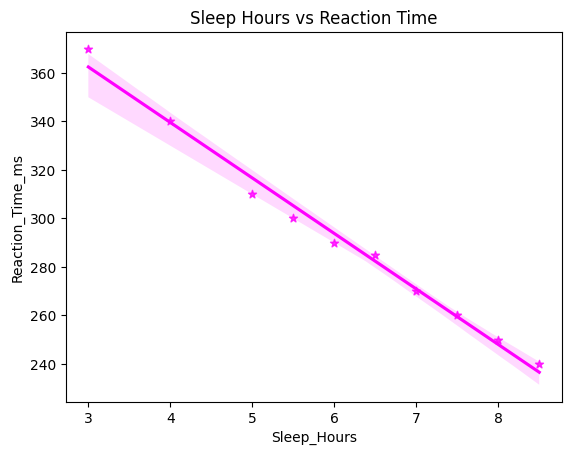

In [5]:
sns.regplot(df, x="Sleep_Hours", y= "Reaction_Time_ms", color= "magenta", marker="*")
plt.title("Sleep Hours vs Reaction Time")
plt.show()

## Training Model

In [6]:
def predict(w, x, b):
    return w*x + b

def cost_function(w, b, x, y):
    m = len(y)
    y_pred = predict(w, x, b)
    cost = (1/(2*m)) * np.sum((y_pred - y) ** 2)
    return cost

def gradient(w, b, x, y):
    m = len(y)
    y_pred = predict(w, x, b)
    dw = (1/m) * np.sum((y_pred - y) * x)
    db = (1/m) * np.sum(y_pred - y)
    return dw, db

def gradient_descent(w, b, x, y, alpha, iters):
    cost_hist = []
    for i in range(iters):
        dw, db = gradient(w, b, x, y)

        w -= alpha * dw
        b -= alpha * db

        cost = cost_function(w, b, x, y)
        # if i < 100:
        cost_hist.append(cost)

        if i % 100 == 0:
            print("Iterations:", i, "Cost =", cost, "w =", w, "b =", b)

    return w, b, cost_hist


## Gradient Descent
Finding w and b

In [7]:
w, b = 0, 0
alpha = 0.01
iters = 50000

w, b, cost_hist = gradient_descent(w, b, x, y, alpha, iters)

Iterations: 0 Cost = 19176.370976249997 w = 17.142500000000002 b = 2.915
Iterations: 100 Cost = 5492.065506059654 w = 37.67014978489994 b = 34.684068368313
Iterations: 200 Cost = 4792.998933233736 w = 33.67759708497344 b = 60.82012856887368
Iterations: 300 Cost = 4183.049963600816 w = 29.94820417936367 b = 85.23349135162545
Iterations: 400 Cost = 3650.8578090649057 w = 26.464625504329913 b = 108.03770429682913
Iterations: 500 Cost = 3186.5099644902525 w = 23.210658788488306 b = 129.33883076096387
Iterations: 600 Cost = 2781.3575793538103 w = 20.171169695364142 b = 149.23594318187273
Iterations: 700 Cost = 2427.8543659769757 w = 17.332021432954427 b = 167.82158386885064
Iterations: 800 Cost = 2119.4160438733975 w = 14.680009002911879 b = 185.18219542082923
Iterations: 900 Cost = 1850.2977022512541 w = 12.202797783540447 b = 201.39852277455157
Iterations: 1000 Cost = 1615.4867964484056 w = 9.88886616094952 b = 216.545988752679
Iterations: 1100 Cost = 1410.6097852732664 w = 7.727451941541

## Convergence Curve
If it flattens, its reached minimum. If it increases or bounces around, it's diverging. 

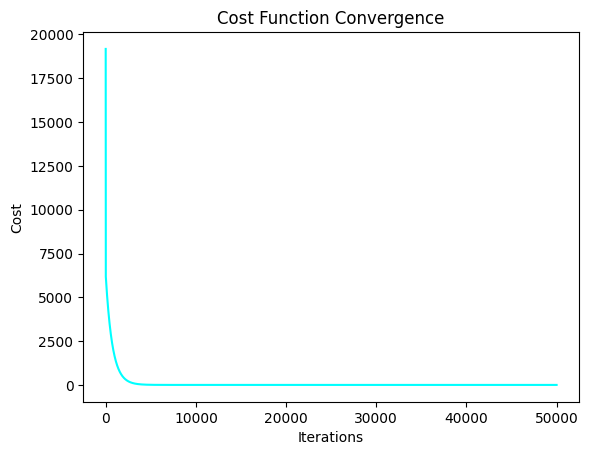

In [8]:
sns.lineplot(x=range(len(cost_hist)), y=cost_hist, color="cyan")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()


In [14]:
x_inp = np.array(8)
print(predict(w, x_inp, b))

247.98387096775096


## Comparison using Sklearn

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape(-1,1), y)
print("Sklearn w:", model.coef_, "b:", model.intercept_)


Sklearn w: [-22.90322581] b: 431.2096774193548


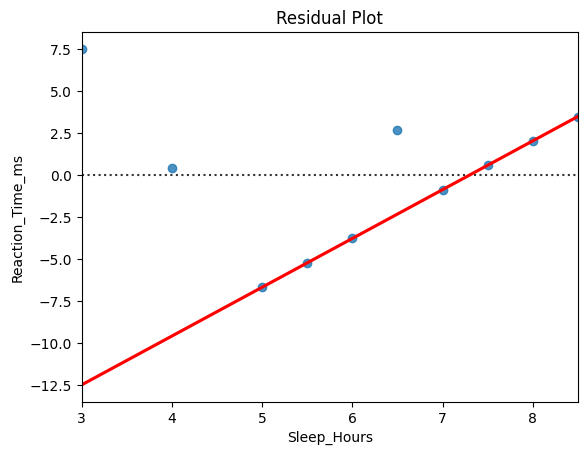

In [11]:
sns.residplot(x="Sleep_Hours", y="Reaction_Time_ms", data=df, line_kws={"color":"red"}, lowess=True)
plt.title("Residual Plot")
plt.show()

In [12]:
from sklearn.metrics import r2_score
print("R² Score:", r2_score(y, predict(w, x, b)))


R² Score: 0.9886952400150367


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", mean_absolute_error(y, predict(w, x, b)))
print("RMSE:", np.sqrt(mean_squared_error(y, predict(w, x, b))))


MAE: 3.3225806451607327
RMSE: 4.090705436442711
